## Описание проекта
    
#### Задача
Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с пользователями на основе аналитических данных.

Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Как понять, что пользователь больше не с вами? Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо.
Индикаторы оттока зависят от специфики отрасли. Когда пользователь редко, но стабильно закупается в интернет-магазине — не похоже, что он «отвалился». А вот если две недели не заходит на канал с ежедневно обновляемым контентом, дела плохи: подписчик заскучал и, кажется, оставил вас.

Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Конечно, не исключено, что он уехал на Бали и по приезде обязательно продолжит ходить на фитнес. Однако чаще бывает наоборот. Если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал — скорее всего, он не вернётся.
Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество анкет пользователей. Ваша задача — провести анализ и подготовить план действий по удержанию клиентов.

А именно:

научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
сформировать типичные портреты пользователей: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
проанализировать основные признаки, наиболее сильно влияющие на отток;
сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
1) выделить целевые группы клиентов;
2) предложить меры по снижению оттока;
3) определить другие особенности взаимодействия с клиентами.
  

### Шаг 1. Загрузите данные

«Культурист-датасаентист» предоставил сведения в csv-файлах. Заказчик подготовил данные, которые содержат данные на месяц до оттока и факт оттока на определённый месяц. 

Путь к файлу: /datasets/gym_churn.csv

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

gym_churn = pd.read_csv('/datasets/gym_churn.csv')
gym_churn.head(10)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
5,1,1,0,0,1,1,1,34,450.743960,1.0,3,2.623477,2.637007,0
6,1,1,1,1,0,6,1,32,94.266389,6.0,2,1.138941,1.277242,0
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
8,1,1,1,1,1,1,1,23,45.409909,1.0,1,1.106239,1.059333,0
9,0,1,0,0,1,1,0,31,65.310836,1.0,11,1.810852,1.951368,0


In [2]:
gym_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


In [3]:
gym_churn.isna().sum()

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

In [4]:
gym_churn.duplicated().sum()

0

## Шаг 2. Проведите исследовательский анализ данных (EDA)
#### Посмотрите на датасет: есть ли в нем отсутствующие признаки, изучите средние значения и стандартные отклонения (пригодится метод describe());

In [5]:
gym_churn.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


### Выводы:
В фитнес центр ходят мужчины и женщины поравну. 84% проживают или работают недалеко от клуба. 
Половина клиентов является сотрудником компании-партнёра клуба, а половина нет.
30% клиентов привели друзья в рамках акции «приведи друга». 
У 90% клиентов есть наличие контактного телефона. 
Возраст клиентов от 18 до 41. Средней возраст 29 лет.
На груповые тренировки ходит только 41% пользователей.
Время с момента первого обращения в фитнес-центр  примерно 3,7 месяца 
Длительность текущего действующего абонемента  в среднем 4,7 месяца.
Срок до окончания текущего действующего абонемента  примерно в среднем 4,3 месяца
Средняя частота посещений в неделю за все время с начала действия абонемента  в среднем 1,88
Средняя частота посещений в неделю за предыдущий месяц  в среднем 1,77
Суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон  в среднем 147
По данным есть вопросы:
1. Надо узнать почему у 10% нет телефона?
2. Почему не ходят старше 41 года? 

#### Посмотрите на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался (воспользуйтесь методом groupby());

In [6]:
gym_churn.groupby('Churn').agg('mean')

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


### Выводы:
Методом groupby(),посмотрела на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался.
Видно, что кто ушел в отток доля партнеров и доля приведенных друзьями сильно ниже. 
В среднем видно, что уходят, те у кого короткий контракт, меньше посещают групповые тренировки.  
Также видно, что уходят, те у кого заканчивается контракт, но это говорит о том, что люди принемают решения ходить дальше или нет, тогда когда заканчивается контракт. Этот критерий не информативен. Телефон есть почти у всех клиентов. В отток уходят более молодые 27 лет. А остаются в среднем 30. Но разница не большая.
Суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон выше у тех, кто остался в клубе - в среднем 158. А у тех, кто перестал ходить 115.'Время с момента первого обращения в фитнес-центр (в месяцах) больше у клиентов, которые продолжают ходить -  4,71. А кто, ушли в отток наверно пришли недавно - 0,99. 
Средняя частота посещений в неделю за все время с начала действия и средняя частота посещений в неделю за предыдущий месяц
абонемента больше у тех, кто продолжает ходить. Вероятно если, человек часто посещвет клуб, то он не собирается уходить.

#### Постройте столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток);

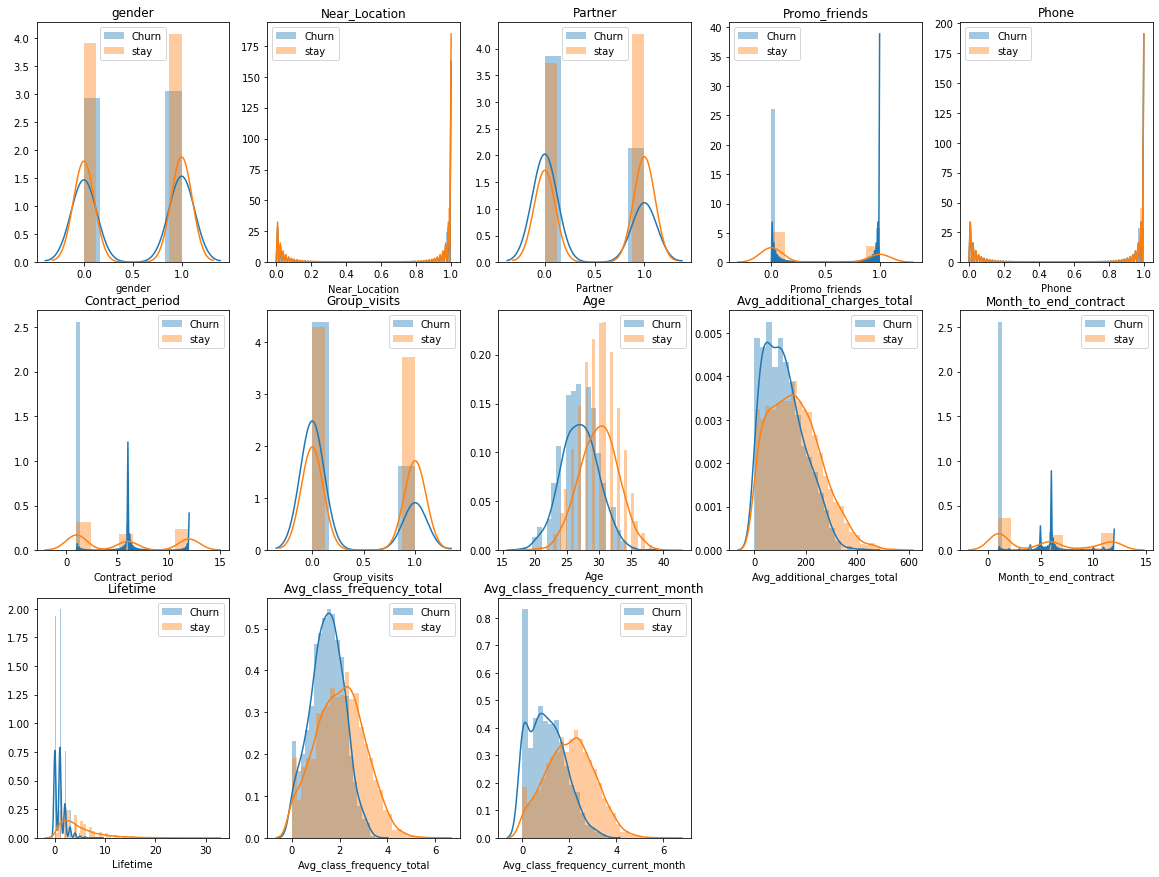

In [7]:
plt.subplots(figsize = (20,15))
plots_in_row = 5
for i, col in enumerate(gym_churn.columns.values):
    if col == 'Churn':
        continue
    sns.distplot(gym_churn.query('Churn==1')[col],label='Churn', ax=plt.subplot(len(gym_churn.columns.values)//plots_in_row+1,plots_in_row ,i+1))
    sns.distplot(gym_churn.query('Churn==0')[col],label='stay')
    plt.title(col)
    plt.legend()

#### Постройте матрицу корреляций и отобразите её.

In [8]:
corr = gym_churn.corr()
corr.style.background_gradient(cmap='coolwarm')

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
gender,1,0.00669923,-0.0104626,-0.00503327,-0.00854212,0.000502261,0.0178789,0.0138069,-0.00933444,-0.00128079,0.0135786,0.0146202,0.00915649,0.000707734
Near_Location,0.00669923,1,-0.00511943,0.210964,-0.0157632,0.150233,0.154728,0.0583578,0.0407612,0.143961,0.0709206,0.0431275,0.0626636,-0.128098
Partner,-0.0104626,-0.00511943,1,0.45196,0.00996961,0.306166,0.0227096,0.0474797,0.0229412,0.294632,0.0612294,0.0249379,0.0455611,-0.157986
Promo_friends,-0.00503327,0.210964,0.45196,1,0.00198159,0.244552,0.12017,0.0501133,0.0368977,0.239553,0.0727211,0.0280632,0.0537684,-0.162233
Phone,-0.00854212,-0.0157632,0.00996961,0.00198159,1,-0.00689326,-0.0100991,-0.0114032,0.00927943,-0.0111963,-0.0188012,0.00834047,0.0133749,-0.0011766
Contract_period,0.000502261,0.150233,0.306166,0.244552,-0.00689326,1,0.169991,0.138249,0.111445,0.973064,0.170725,0.0962111,0.159407,-0.389984
Group_visits,0.0178789,0.154728,0.0227096,0.12017,-0.0100991,0.169991,1,0.0809336,0.0320791,0.163703,0.0758528,0.0566948,0.0759233,-0.175325
Age,0.0138069,0.0583578,0.0474797,0.0501133,-0.0114032,0.138249,0.0809336,1,0.0802401,0.134511,0.164693,0.119953,0.183095,-0.404735
Avg_additional_charges_total,-0.00933444,0.0407612,0.0229412,0.0368977,0.00927943,0.111445,0.0320791,0.0802401,1,0.113958,0.0790283,0.0444264,0.0795697,-0.198697
Month_to_end_contract,-0.00128079,0.143961,0.294632,0.239553,-0.0111963,0.973064,0.163703,0.134511,0.113958,1,0.161078,0.0853867,0.147605,-0.381393


### Выводы:
#### Отток обратно скоррелирован 
- с возрастом 
- со сроком до окончания текущего действующего абонемента (в месяцах). 
- с временем с момента первого обращения в фитнес-центр (в месяцах)
- со средней частота посещений в неделю за все время с начала действия абонемента
- со срок до окончания текущего действующего абонемента (в месяцах)
- средняя частота посещений в неделю за предыдущий месяц
#### Отток не скоррелирован 
- пол
- проживание или работа в районе, где находится фитнес-центр
- сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента)	
- факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента)	
-  наличие контактного телефона
- факт посещения групповых занятий
- суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон

Есть зависимость Month_to_end_contract от Contract_period ну это и понятно. Promo_friends и Partner скоррелированы. вероятно часто друзей зовут коллеги.

## Шаг 3. Постройте модель прогнозирования оттока пользователей
#### Постройте модель бинарной классификации пользователей, где целевой признак — факт оттока пользователя в следующем месяце:
#### Разбейте данные на обучающую и валидационную выборку функцией train_test_split().

In [9]:
# разделим наши данные на признаки (матрица X) и целевую переменную (y)
X = gym_churn.drop('Churn', axis = 1)
y = gym_churn['Churn']  

# разделяем модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify =y)

# обучите StandartScaler на обучающей выборке
scaler = StandardScaler()
scaler.fit(X_train)

# Преобразуйте обучающий и валидационные наборы данных
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

#### Обучите модель на train-выборке двумя способами:
1) логистической регрессией
2) случайным лесом

In [10]:
def print_all_metrics(y_true, y_pred, y_proba, title = 'Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))
    print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_proba)))

In [11]:
# зададим алгоритм для модели логистической регрессии
lr_model = LogisticRegression(solver = 'lbfgs')
# обучим модель
lr_model.fit(X_train_st, y_train)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:,1]
# выведем все метрики
print_all_metrics(y_test, lr_predictions, lr_probabilities , title='Метрики для модели логистической регрессии:')

Метрики для модели логистической регрессии:
	Accuracy: 0.94
	Precision: 0.90
	Recall: 0.85
	F1: 0.87
	ROC_AUC: 0.98


Доля правильных ответов алгоритма (Accuracy) достаточно высока 0.94
precision (точность) высокая точность 0.9
recall (полнота) большая полнота 0.85
F1 (метрика, учитывающая баланс между метриками) 0.87
Для оценки качества классификатора применяют метрику roc_auc(площадь под кривой ошибок — AUC-ROC) 0.98

In [12]:
# зададим алгоритм для новой модели на основе алгоритма случайного леса
rf_model =  RandomForestClassifier(n_estimators = 100, random_state = 0) 
# обучим модель случайного леса
rf_model.fit(X_train_st, y_train)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions =  rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]
# выведем все метрики
print_all_metrics(y_test, rf_predictions, rf_probabilities, title = 'Метрики для модели случайного леса:')

Метрики для модели случайного леса:
	Accuracy: 0.92
	Precision: 0.88
	Recall: 0.83
	F1: 0.85
	ROC_AUC: 0.97


Доля правильных ответов алгоритма (Accuracy) достаточно высока 0.92
precision (точность) высокая точность 0.88
recall (полнота) большая полнота 0.83
F1 (метрика, учитывающая баланс между метриками) 0.85
Для оценки качества классификатора применяют метрику roc_auc(площадь под кривой ошибок — AUC-ROC) 0.97

#### Оцените метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравните по ним модели. Какая модель показала себя лучше на основании метрик?
###### Не забудьте указать параметр random_state при разделении выборки и задании алгоритма.

### Выводы:
Обе модели очень хорошо помогают предсказывать отток. Модели логистической регрессии чуть лучше подходит, для этой задачи модели случайного леса оказались  немного слабее. Хоть дерево и более интерпретируемая модель, но для этой задачи по метрике AUC-ROC оно оказалось немного слабее, чем логистическая регрессия.
Доля правильных ответов алгоритма (Accuracy) достаточно высока 0.94
precision (точность) высокая точность 0.9
recall (полнота) большая полнота 0.85
F1 (метрика, учитывающая баланс между метриками) 0.87
Для оценки качества классификатора применяют метрику roc_auc(площадь под кривой ошибок — AUC-ROC) 0.98

## Шаг 4. Сделайте кластеризацию пользователей
Отложите в сторону столбец с оттоком и проведите кластеризацию объектов (пользователей):
#### Стандартизируйте данные.

In [13]:
gym_churn_new=gym_churn.drop('Churn', axis = 1)
# стандартизируем данные
sc = StandardScaler()
x_sc = sc.fit_transform(gym_churn_new)
x_sc

array([[ 0.97970588,  0.42788074,  1.02686062, ..., -0.19332863,
        -1.91191971, -1.67847198],
       [-1.0207145 ,  0.42788074, -0.973842  , ...,  0.87368001,
         0.04517569,  0.1360137 ],
       [-1.0207145 ,  0.42788074,  1.02686062, ..., -0.46008079,
        -0.02049263, -0.02901851],
       ...,
       [ 0.97970588,  0.42788074,  1.02686062, ..., -0.46008079,
         0.93313947,  1.01103141],
       [-1.0207145 ,  0.42788074,  1.02686062, ..., -0.19332863,
        -0.25604937, -0.16225246],
       [ 0.97970588, -2.33709981,  1.02686062, ..., -0.72683295,
        -0.79947418, -0.69509885]])

In [14]:
linked = linkage(x_sc, method = 'ward')

#### Постройте матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуйте дендрограмму. Внимание: отрисовка дендрограммы может занять время! На основании полученного графика предположите, какое количество кластеров можно выделить.

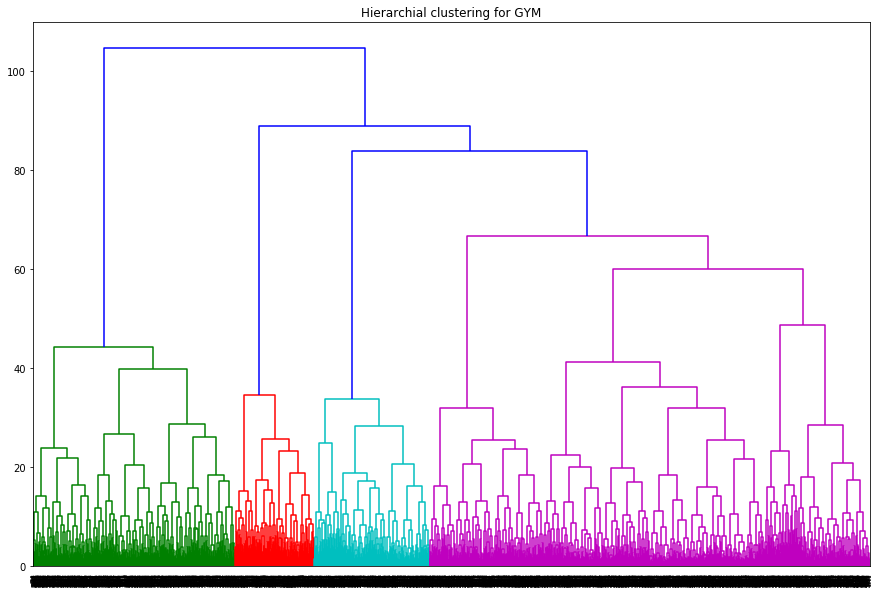

In [15]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchial clustering for GYM')
plt.show()

### Выводы:
Я постоила матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисвала дендрограмму.  На основании полученного графика можно выделить 4 кластера.

#### Обучите модель кластеризации на основании алгоритма K-Means и спрогнозируйте кластеры клиентов. Договоримся за число кластеров принять n=5, чтобы ваши результаты можно было сравнивать с результатами остальных студентов. Однако, конечно, в жизни никто не скажет вам правильный ответ, и решение остаётся за вами (на основании изучения графика из предыдущего пункта).

In [16]:
km = KMeans(n_clusters = 5, random_state = 0) # задаём число кластеров, равное 5

labels = km.fit_predict(x_sc) # применяем алгоритм к данным и формируем вектор кластеров

#### Посмотрите на средние значения признаков для кластеров. Можно ли сразу что-то заметить?

In [17]:
# сохраняем метки кластера в поле нашего датасета
gym_churn['cluster_km'] = labels

# выводим статистику по средним значениям наших признаков по кластеру
gym_churn.groupby('cluster_km').mean()


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster_km,,,,,,,,,,,,,,
0,0.502473,0.959446,0.783383,0.574679,1.000000,10.884273,0.543027,29.980218,160.706969,9.950544,4.738872,1.983305,1.976225,0.027695
1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983,0.514263
4,0.560335,0.976105,0.356033,0.229391,0.998805,2.665472,0.473118,30.127838,161.724258,2.455197,4.896057,2.851531,2.849473,0.068100


### Выводы:
Мы взяли данные и откластерирозавали построили распределения признаков для кластеров. Увидели, что в 2 и 3 кластерах отток высокий. 
- примерно одинаково мужчин и женщин. Только в 4 группе больше доля мужчин
- проживание или работа в районе, где находится фитнес-центр. Есть два ярко выраженных кластера в 2 никто не живет рядом и в 3 все живут или работаю рядом с фитнес центром.
- сотрудник компании-партнёра клуба -в первом кластере доля партнеров 78% а в остальных 35-50%
- факт первоначальной записи в рамках акции «приведи друга» - во 2 кластере маленькая доля 8%, а в 57% доля большая.
- наличие контактного телефона есть везде кроме 1 кластера
- длительность текущего действующего абонемента в первом кластере 11 месяцев, в остальных от 2 до 5
- факт посещения групповых занятий в группе 2 доля самая низкая, в группе 1 доля самая большая
- возраст примерно одинаковый
- суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон -в 0 и 4 группе доля самая большая 160, а 2 и 3 группе всего 132-136
- срок до окончания текущего действующего абонемента (в месяцах) - в 0 кластере самая большая доля 10, во первом кластере 4,5, а в остальных примерно 2
- время с момента первого обращения в фитнес-центр (в месяцах) - в 0,1 и 4 самая большая доля 4-5, в остальных кластерах примерно 2,5-3
- средняя частота посещений в неделю за все время с начала действия абонемента - в 4 кластере самая большая доля 2,9, в 0 и 1 около 2 и самая маленькая доля в третьем кластере 1,25
- средняя частота посещений в неделю за предыдущий месяц - в 4 кластере самая большая доля 2,9, в 0 и 1 около 2 и самая маленькая доля в третьем кластере 1



#### Постройте распределения признаков для кластеров. Можно ли что-то заметить по ним?

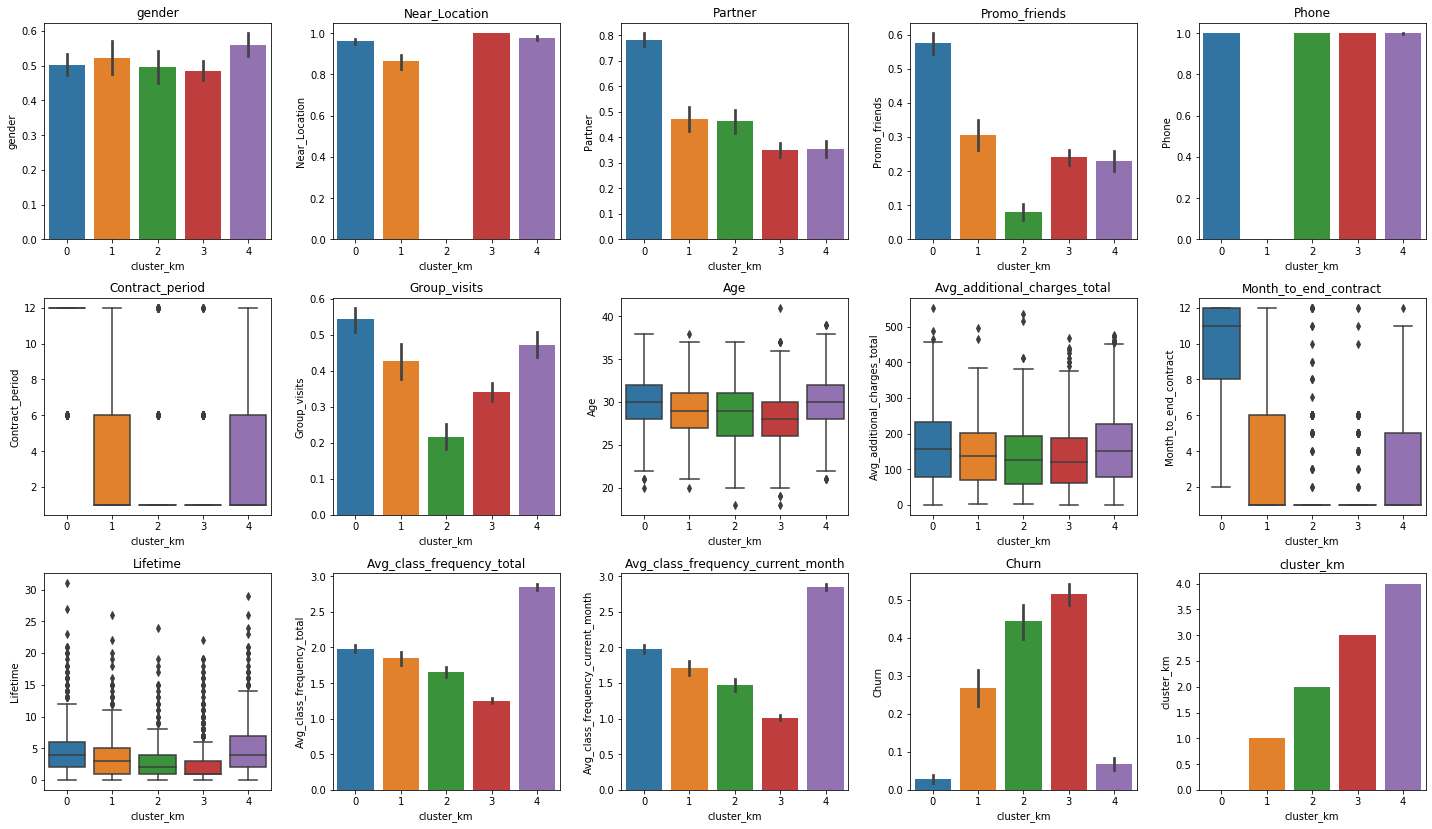

In [18]:
plt.subplots(figsize=(20,15))
plots_in_raw = 5
non_binary_vars = ['Age', 'Avg_additional_charges_total', 'Lifetime', 'Contract_period', 'Month_to_end_contract']
for i ,col in enumerate(gym_churn.columns.values):
    ax = plt.subplot(len(gym_churn.columns.values)//plots_in_raw+1, plots_in_raw,i+1)
    if col in non_binary_vars:
        sns.boxplot(data=gym_churn, x='cluster_km', y=col, ax=ax)
    else:
        sns.barplot(data=gym_churn, x='cluster_km', y=col, ax=ax)
    plt.title(col)    
plt.tight_layout()
plt.show()

### Выводы:
Я построила распределения признаков для кластеров. 
- примерно одинаково мужчин и женщин. Только в 4 группе больше доля мужчин
- проживание или работа в районе, где находится фитнес-центр. Есть два ярко выраженных кластера в 2 никто не живет рядом и в 3 все живут или работаю рядом с фитнес центром.
- сотрудник компании-партнёра клуба -в первом кластере доля партнеров 78% а в остальных 35-50%
- факт первоначальной записи в рамках акции «приведи друга» - во 2 кластере маленькая доля 8%, а в 57% доля большая.
- наличие контактного телефона есть везде кроме 1 кластера
- длительность текущего действующего абонемента в первом кластере 11 месяцев, в остальных от 2 до 5
- факт посещения групповых занятий в группе 2 доля самая низкая, в группе 1 доля самая большая
- возраст примерно одинаковый
- суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон -в 0 и 4 группе доля самая большая 160, а 2 и 3 группе всего 132-136
- срок до окончания текущего действующего абонемента (в месяцах) - в 0 кластере самая большая доля 10, во первом кластере 4,5, а в остальных примерно 2
- время с момента первого обращения в фитнес-центр (в месяцах) - в 0,1 и 4 самая большая доля 4-5, в остальных кластерах примерно 2,5-3
- средняя частота посещений в неделю за все время с начала действия абонемента - в 4 кластере самая большая доля 2,9, в 0 и 1 около 2 и самая маленькая доля в третьем кластере 1,25
- средняя частота посещений в неделю за предыдущий месяц - в 4 кластере самая большая доля 2,9, в 0 и 1 около 2 и самая маленькая доля в третьем кластере 1



#### Для каждого полученного кластера посчитайте долю оттока (методом groupby()). Отличаются ли они по доле оттока? Какие кластеры склонны к оттоку, а какие — надёжны?

In [19]:
gym_share_churn =  gym_churn.groupby('cluster_km').agg({'Churn': 'mean'})
gym_share_churn

,Churn
cluster_km,
0,0.027695
1,0.267532
2,0.443564
3,0.514263
4,0.068100


### Выводы:
Для каждого полученного кластера посчитала долю оттока (методом groupby()). Они отличаются ли они по доле оттока. 2,3 склонны к оттоку, а 0, 4 — надёжны.

## Шаг 5. Сформулируйте выводы и сделайте базовые рекомендации по работе с клиентами
#### Сформулируйте основные выводы и предложите рекомендации для стратегии взаимодействия с пользователями и их удержания.

#### В рамках задачи оттока клиентов фитнес центра мы собрали 4000 пользователей  и данные по ним пол, расстояние до фитнес центра и тд.

### Видимые закономерности

Мы видим, что фитнес центром перестают пользоваться люди
- те, кто далеко живет и работает от фитнес центра
- те, кто заключает короткие контракты
- те, кто не ходит на групповые занятия
- те, кто мало ходят в фитнес центр
Но при этом сильными факторами, которые говорит, что клиент останется является то, что он пришел из компании партнера, его порекомендовал друг или он ходит на групповые занятия.
Важным фактором предсказанием того будет ли клиент пользоваться фитнесом в следующем месяце - является окончание контракта.
Люди принимают решение ходить дальше или нет после окончания контракта. 

### Предсказание оттока

В рамках данного исследования мы попробовали предсказать отток методами машинного обучения. Попробовали два вида моделей - Модель логистической регрессии и модель случайного леса. Обе модели хорошо обучаются и показали  F1 (метрика, учитывающая баланс между метриками) 0.87 и 0.85 . Методы можно использовать, чтобы предсказывать отток и для способов его уменьшения.

### Выводы и рекомендации

Во-первых мы можем использовать нашу модель для каждого клиента и предсказывать его отток. Благодаря этому можно выделить тех кто уйдет в отток с большой вероятностью и начать с ними таргетированно работать. Возможными вариантами такой работы могут быть:
привлечения на групповые занятия, скидки на продление контракта, мотивировать людей заключать более длинные контракты (давать скидку), считаю целесообразно поддерживать программу приведи друга. Так как такие клиенты с большей вероятностью становятся лояльными клиентами. Очень лояльными являются компании-партнера. Считаю необходимым развивать такие программы. В дальнейшем советуем строить фитнес центры ближе к потенциальным компаниям-партнерам.

### Открытые вопросы

По данным есть вопросы:
1. Надо узнать почему у 10% нет телефона?
2. Почему не ходят старше 41 года?
3. Так как те, кого привели друзья являются лояльными клиентами. Хотелось бы посмотреть на лояльность самого клиента. Возможно необходимо предоставлять групповые скидки
